In [17]:
import pandas as pd

# Load data
data = pd.read_csv("RAW_interactions_textProc.csv")

In [19]:
len(data)

1132367

In [35]:
from sklearn.model_selection import train_test_split

X = data['review']
y = data['rating']

X_test = X[:10000]
y_test = y[:10000]
X_train = X[10000:]
y_train = y[10000:]

X_train = X_train.fillna('')
X_test = X_test.fillna('')

In [121]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=8000)

# Fit and transform the training data
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data
X_test_tfidf = vectorizer.transform(X_test)

In [51]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [123]:
parameters = {'alpha': [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]}
ridge = Ridge()
clf = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
clf.fit(X_train_tfidf, y_train)
print("Best alpha for Ridge:", clf.best_params_)

Best alpha for Ridge: {'alpha': 10.0}


In [124]:
# Train a Ridge Regression model
rr_model = Ridge(alpha = 10.0)
rr_model.fit(X_train_tfidf, y_train)
rr_y_pred = rr_model.predict(X_test_tfidf)
rr_mse = mean_squared_error(y_test, rr_y_pred)
rr_mae = mean_absolute_error(y_test, rr_y_pred)
rr_r2 = r2_score(y_test, rr_y_pred)
print(f"Mean Squared Error: {rr_mse:.4f}")
print(f"Mean Absolute Error: {rr_mae:.4f}")
print(f"R2 Score: {rr_r2:.4f}")

Mean Squared Error: 1.2823
Mean Absolute Error: 0.7039
R2 Score: 0.1793


In [125]:
# Train an XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_tfidf, y_train)
xgb_y_pred = xgb_model.predict(X_test_tfidf)
xgb_mse = mean_squared_error(y_test, xgb_y_pred)
xgb_mae = mean_absolute_error(y_test, xgb_y_pred)
xgb_r2 = r2_score(y_test, xgb_y_pred)
print(f"Mean Squared Error (XGBoost): {xgb_mse:.4f}")
print(f"Mean Absolute Error (XGBoost): {xgb_mae:.4f}")
print(f"R2 Score (XGBoost): {xgb_r2:.4f}")

Mean Squared Error (XGBoost): 1.3127
Mean Absolute Error (XGBoost): 0.7126
R2 Score (XGBoost): 0.1598


In [131]:
# Analyze the most important words (coefficients)
feature_names = vectorizer.get_feature_names_out()
coefficients = rr_model.coef_

# Get top 20 positive and negative words
top_positive_indices = coefficients.argsort()[-20:][::-1]
top_negative_indices = coefficients.argsort()[:20]

print("Top Positive Words:")
for i in top_positive_indices:
    print(f"{feature_names[i]}: {coefficients[i]:.4f}")

print("\nTop Negative Words:")
for i in top_negative_indices:
    print(f"{feature_names[i]}: {coefficients[i]:.4f}")

Top Positive Words:
great: 1.6078
thank: 1.5433
delici: 1.4680
excel: 1.4407
perfect: 1.4375
wonder: 1.3778
fantast: 1.3651
cakepop: 1.3021
love: 1.2992
outstand: 1.2215
fabul: 1.1908
awesom: 1.1255
roxygirl: 1.1125
exceed: 1.0953
best: 1.0937
amaz: 1.0880
worri: 1.0610
perfectli: 1.0588
forgot: 1.0560
dee: 1.0503

Top Negative Words:
worst: -3.9056
assign: -3.4738
homepag: -3.4419
ined: -3.3043
horribl: -3.1292
sorri: -3.0825
wast: -2.8880
aw: -2.8600
terribl: -2.6836
disast: -2.5919
tasteless: -2.5422
disgust: -2.5232
garbag: -2.3372
incorrect: -2.2907
question: -2.2447
wilbur: -2.2011
yuck: -2.1977
putnam: -2.1879
wors: -2.1471
salvag: -2.1218


In [111]:
# Define a function to transform a text column into TF-IDF features
def compute_tfidf_features(data, column_name, max_features=200):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=max_features)
    tfidf_matrix = vectorizer.fit_transform(data[column_name].fillna(''))
    feature_names = vectorizer.get_feature_names_out()
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"{column_name}_{feat}" for feat in feature_names])
    return tfidf_df

In [113]:
# Process each textual column
tfidf_review = compute_tfidf_features(data, 'review')
tfidf_review['rating'] = data['rating'].reset_index(drop=True)
tfidf_review.describe()

,review_absolut,review_ad,review_add,review_addit,review_alway,review_amaz,review_anoth,review_appl,review_ate,review_awesom,...,review_way,review_went,review_white,review_wonder,review_work,review_wow,review_year,review_yum,review_yummi,rating
count,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,...,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.027613e-02,3.693163e-02,2.384034e-02,7.721674e-03,1.002487e-02,9.301953e-03,1.094912e-02,7.252032e-03,7.395929e-03,1.113517e-02,...,1.786589e-02,7.707736e-03,8.622067e-03,2.590478e-02,1.689548e-02,9.021188e-03,1.244810e-02,1.088987e-02,1.876252e-02,4.411016e+00
std,6.282843e-02,8.780684e-02,7.776955e-02,5.064203e-02,5.937532e-02,6.236998e-02,5.741597e-02,5.690057e-02,5.235332e-02,6.940548e-02,...,7.296263e-02,5.178184e-02,5.211919e-02,8.703333e-02,7.157973e-02,5.928605e-02,6.751630e-02,7.157833e-02,8.463819e-02,1.264752e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00


In [114]:
# Compute correlations
correlation_matrix = tfidf_review.corr()

# Extract correlations with the rating column
rating_correlation = correlation_matrix['rating'].sort_values(ascending=False)

In [115]:
# Display the top 10 features most correlated with ratings
print("Top 10 TF-IDF Features Correlated with Rating:")
print(rating_correlation.head(30))

Top 10 TF-IDF Features Correlated with Rating:
rating            1.000000
review_thank      0.145488
review_love       0.085835
review_great      0.081228
review_delici     0.080205
review_share      0.071278
review_wonder     0.069010
review_easi       0.064569
review_perfect    0.061973
review_keeper     0.056232
review_post       0.052864
review_excel      0.049138
review_tag        0.048207
review_use        0.045070
review_fantast    0.043342
review_yummi      0.042404
review_serv       0.042284
review_wow        0.038914
review_yum        0.036708
review_simpl      0.036328
review_dh         0.035266
review_absolut    0.034310
review_oh         0.033270
review_definit    0.032432
review_dinner     0.032238
review_enjoy      0.032089
review_salad      0.031919
review_hit        0.031902
review_awesom     0.031655
review_everyon    0.030682
Name: rating, dtype: float64


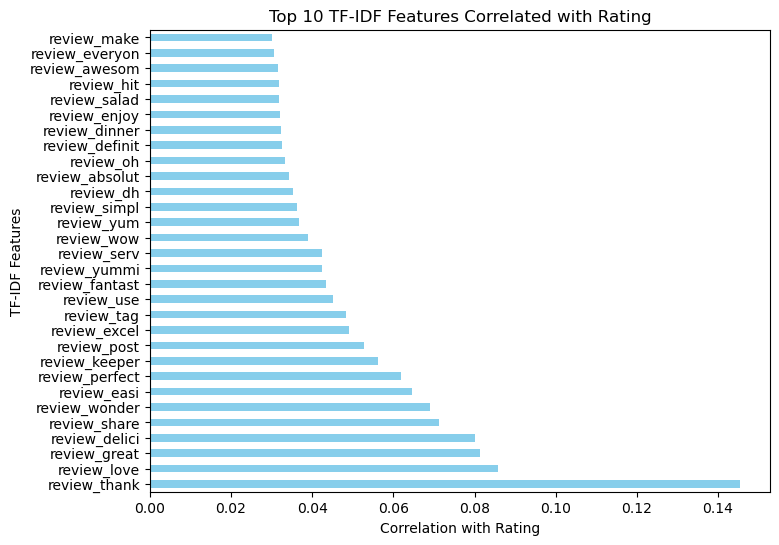

In [116]:
# Visualize the top features
import matplotlib.pyplot as plt

rating_correlation[1:31].plot(kind='barh', figsize=(8, 6), color='skyblue')
plt.title("Top 10 TF-IDF Features Correlated with Rating")
plt.xlabel("Correlation with Rating")
plt.ylabel("TF-IDF Features")
plt.show()